# TELECOM CUSTOMER CHURN PREDICTION
---

## 1. IMPORT LIBRARIES
---

In [283]:
! pip install mysql-connector-python

In [293]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2. MOUNT GOOGLE DRIVE
---

In [291]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 3. LOAD DATA
---

In [292]:
df = pd.read_csv('/content/drive/MyDrive/Client Project/telecom_churn_data.csv')
df

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


## 4. DATA UNDERSTANDING
---
__Business Insight__

- Dataset contains 4617 customers

- No missing values → reliable operational data

- Mix of usage, billing, and service interaction variables

In [ ]:
# Shape
df.shape

(4617, 21)

In [ ]:
# Data Types
df.dtypes

,0
State,object
Account Length,object
Area Code,object
Phone,object
International Plan,object
VMail Plan,object
VMail Message,object
Day Mins,object
Day Calls,object
Day Charge,object


In [ ]:
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

In [ ]:
# Statistical summary
df.describe()


,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,409-6884,no,no,0,154,102,26.18,...,105,14.25,188.2,105,9.66,11.1,3,3,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [ ]:
# Missing values
df.isnull().sum()

,0
State,0
Account Length,0
Area Code,0
Phone,0
International Plan,0
VMail Plan,0
VMail Message,0
Day Mins,0
Day Calls,0
Day Charge,0


---
## 5. EXPLORATORY DATA ANALYSIS (EDA)

---
### 5.1 Target Variable Distribution (Churn Analysis)
__Churn Distribution – Data Insights__

- The dataset shows a clear class imbalance, with the majority of customers labeled as Non-Churn (No).

- Approximately 10–15% of customers have churned, which aligns with the business concern highlighted by No-Churn Telecom.

- This imbalance indicates that accuracy alone is not sufficient for model evaluation.

- Metrics such as Recall, F1-score, and ROC-AUC are more appropriate to measure churn prediction performance.

- The observed churn rate confirms the need for targeted retention strategies rather than blanket offers.

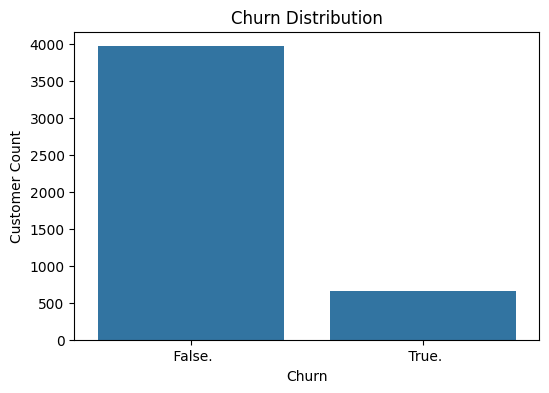

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Customer Count")
plt.show()




In [ ]:
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
churn_percentage


,proportion
Churn,
False.,85.79164
True.,14.20836


---
### 5.2 Categorical Feature Analysis vs Churn

#### 5.2.1 International Plan vs Churn
__Insight__

- Customers with International Plan = Yes show higher churn

- Indicates pricing dissatisfaction or competitor offers

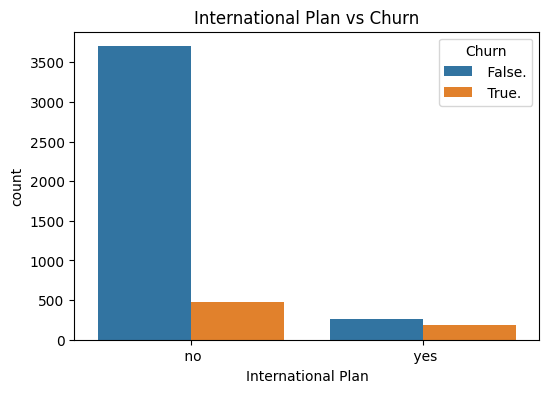

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='International Plan', hue='Churn', data=df)
plt.title("International Plan vs Churn")
plt.show()


#### 5.2.2 Voice Mail Plan vs Churn
__Insight__

- Voice Mail Plan users are more stable

- Indicates higher engagement and service stickiness

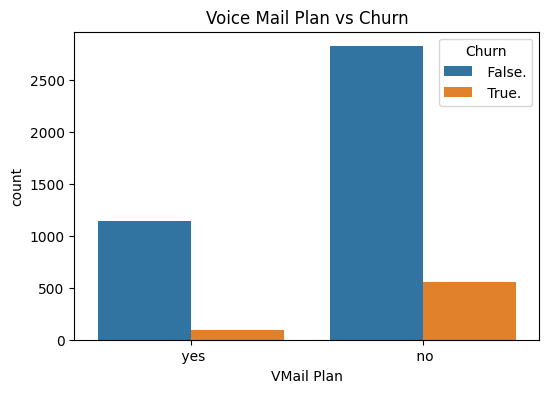

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='VMail Plan', hue='Churn', data=df)
plt.title("Voice Mail Plan vs Churn")
plt.show()


---
### 5.3 Numerical Feature Distribution

#### 5.3.1 Customer Service Calls
__Business Insight__

- Churned customers make significantly more service calls

- Strong indicator of dissatisfaction

- High-impact retention trigger

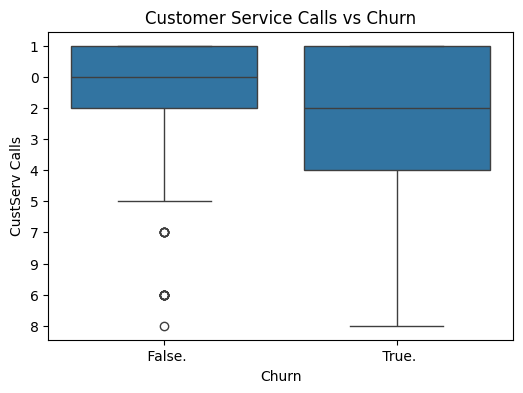

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='CustServ Calls', data=df)
plt.title("Customer Service Calls vs Churn")
plt.show()


#### 5.3.2 Day Minutes Usage
__Insight__

- High day usage customers churn more

- Possible billing shock or tariff issues

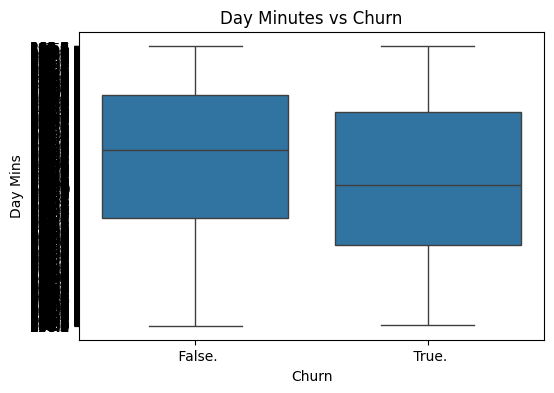

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Day Mins', data=df)
plt.title("Day Minutes vs Churn")
plt.show()


---
### 5.4 Correlation Analysis
__Key Observations__

- Strong correlation between:

  - Minutes ↔ Charges (expected)

- Customer service calls strongly linked to churn

- No extreme multicollinearity issues

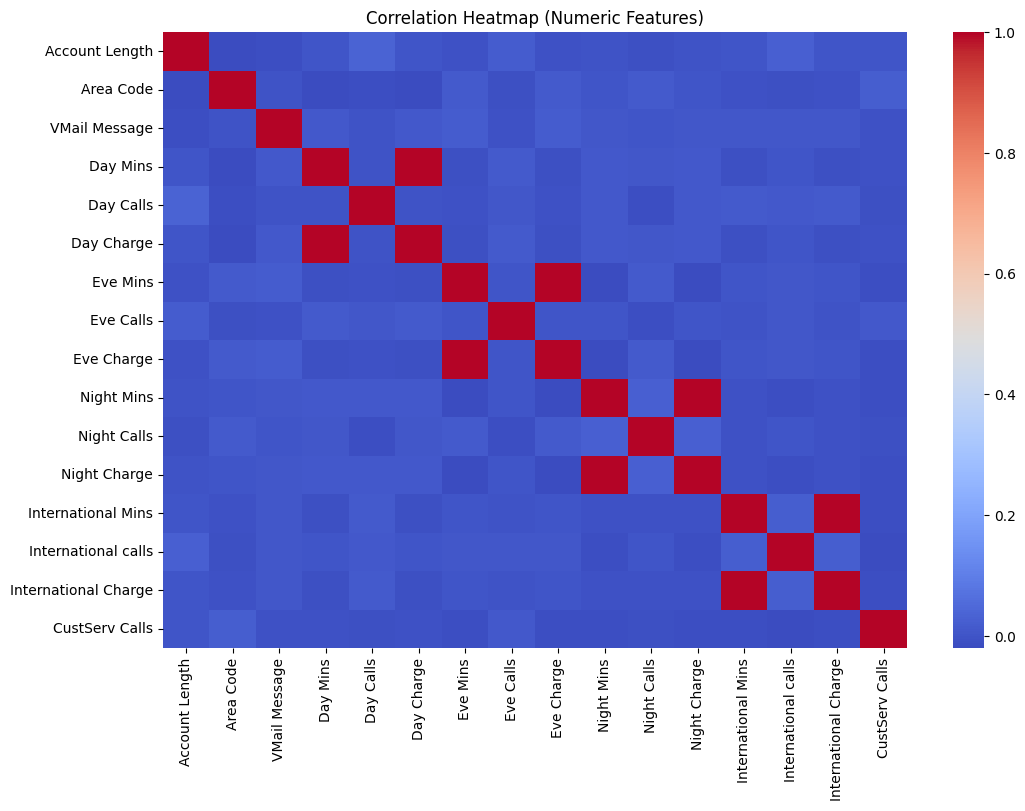

In [ ]:
# Convert all possible columns to numeric safely
df_numeric = df.apply(pd.to_numeric, errors='coerce')

df_numeric = df_numeric.dropna(axis=1, how='all')

plt.figure(figsize=(12,8))
sns.heatmap(
    df_numeric.corr(),
    cmap='coolwarm',
    annot=False
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


---
### 5.5 Churn Drivers Summary (EDA Conclusions)
| Factor                 | Observation             | Business Action         |
| ---------------------- | ----------------------- | ----------------------- |
| Customer Service Calls | High calls → high churn | Priority ticket routing |
| International Plan     | Higher churn            | Revise pricing / offers |
| Day Usage & Charges    | Heavy users churn more  | Loyalty discounts       |
| Voice Mail Plan        | Lower churn             | Promote add-on          |


---
### 5.6 EDA → Modeling Justification
__EDA supports:__

- Tree-based models (non-linear relationships)

- Random Forest as final model

- Churn probability scoring for campaigns

---
## 6. FEATURE ENGINEERING & PREPROCESSING

---
### 6.1 Target Variable Encoding (CHURN-FLAG)
Business requirement:

- __True. → 1__

- __False. → 0__

In [ ]:
df['Churn'].unique()

array([' False.', ' True.'], dtype=object)

In [ ]:
df['Churn'].value_counts()

,count
Churn,
False.,3961
True.,656


In [ ]:
# Clean text
df['Churn'] = df['Churn'].str.strip().str.replace('.', '', regex=False)

# Verify
df['Churn'].unique()


array(['False', 'True'], dtype=object)

In [ ]:
df['Churn'] = df['Churn'].map({'True': 1, 'False': 0})

df['Churn'].isna().sum()

np.int64(0)

---
### 6.2 Drop Irrelevant Columns
Columns like __State__ and __Phone Number__ do not contribute to churn prediction.

In [ ]:
df.drop(['State', 'Phone'], axis=1, inplace=True)

---
### 6.3 Feature–Target Split

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


---
### 6.4 Encode Categorical Variables

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['Account Length', 'Area Code', 'International Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International calls', 'International Charge', 'CustServ Calls']
Numerical Columns: []


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        drop='first'
    ))
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)


In [ ]:
X_processed = preprocessing_pipeline.fit_transform(X)


In [ ]:
X_processed.shape

(4617, 11080)

---
### 6.5 Save Preprocessing Pipeline

In [ ]:
joblib.dump(preprocessing_pipeline, "telecom_preprocessing_pipeline.pkl")



['telecom_preprocessing_pipeline.pkl']

---
### 6.6 Load and Use Later

In [ ]:
loaded_preprocessing = joblib.load("telecom_preprocessing_pipeline.pkl")
X_new_processed = loaded_preprocessing.transform(X)


---
## 7. TRAIN-TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new_processed, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


---
## 8. MODEL BUILDING AND EVALUATION FUCTION

---
### Evaluation Function

In [ ]:
results = {}
roc_curves = {}

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    results[name] = {
        "ROC_AUC": roc_auc_score(y_test, y_prob),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr)

    return model


---
### 8.1 Logistic Regression
Why Logistic Regression?

- Highly interpretable

- Good baseline model

- Produces churn probabilities (risk scores)

In [ ]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model = evaluate_model("Logistic Regression", lr_model, X_train, X_test, y_train, y_test)


Accuracy : 0.8181818181818182
Precision: 0.36627906976744184
Recall   : 0.38414634146341464
F1 Score : 0.375
ROC AUC  : 0.7005426890797667

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       991
           1       0.37      0.38      0.38       164

    accuracy                           0.82      1155
   macro avg       0.63      0.64      0.63      1155
weighted avg       0.82      0.82      0.82      1155



---
### 8.2 Decision Tree Classifier
Why Decision Tree?

- Captures non-linear patterns

- Easy to explain to business stakeholders

In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=50,
    random_state=42
)

dt_model = evaluate_model("Decision Tree", dt_model, X_train, X_test, y_train, y_test)


Accuracy : 0.8761904761904762
Precision: 0.7058823529411765
Recall   : 0.21951219512195122
F1 Score : 0.33488372093023255
ROC AUC  : 0.724859097733258

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       991
           1       0.71      0.22      0.33       164

    accuracy                           0.88      1155
   macro avg       0.79      0.60      0.63      1155
weighted avg       0.86      0.88      0.85      1155



---
### 8.3 Random Forest
Why Random Forest?

- Best performance on churn problems

- Handles feature interactions well

- Reduces overfitting

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=30,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model = evaluate_model("Random Forest", rf_model, X_train, X_test, y_train, y_test)


Accuracy : 0.8406926406926407
Precision: 0.4264705882352941
Recall   : 0.35365853658536583
F1 Score : 0.38666666666666666
ROC AUC  : 0.7382971130417662

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       991
           1       0.43      0.35      0.39       164

    accuracy                           0.84      1155
   macro avg       0.66      0.64      0.65      1155
weighted avg       0.83      0.84      0.83      1155



---
### 8.4 Gradient Boosting
Why Gradient Boosting?
- Often beats Random Forest
- Handles complex churn patterns
- Strong bias-variance balance

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

evaluate_model("Gradient Boosting", gb_model, X_train, X_test, y_train, y_test)


Accuracy : 0.8787878787878788
Precision: 0.7608695652173914
Recall   : 0.21341463414634146
F1 Score : 0.3333333333333333
ROC AUC  : 0.7310120351455784

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       991
           1       0.76      0.21      0.33       164

    accuracy                           0.88      1155
   macro avg       0.82      0.60      0.63      1155
weighted avg       0.87      0.88      0.85      1155



GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

---
### 8.5 HistGradientBoostingClassifier

In [ ]:
hgb_model = HistGradientBoostingClassifier(
    max_iter=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

# Note: this model does NOT need scaled data, but works fine with it
hgb_model = evaluate_model("HistGradientBoosting", hgb_model, X_train.toarray(), X_test.toarray(), y_train, y_test)

Accuracy : 0.8666666666666667
Precision: 0.5757575757575758
Recall   : 0.23170731707317074
F1 Score : 0.33043478260869563
ROC AUC  : 0.7151189978095542

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       991
           1       0.58      0.23      0.33       164

    accuracy                           0.87      1155
   macro avg       0.73      0.60      0.63      1155
weighted avg       0.84      0.87      0.84      1155



---
### 8.6 XGBOOST

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

xgb_model = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)


Accuracy : 0.8744588744588745
Precision: 0.6338028169014085
Recall   : 0.27439024390243905
F1 Score : 0.3829787234042553
ROC AUC  : 0.7272587433240629

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       991
           1       0.63      0.27      0.38       164

    accuracy                           0.87      1155
   macro avg       0.76      0.62      0.66      1155
weighted avg       0.85      0.87      0.85      1155



---
## 9.MODEL EVALUATION AND COMPARISON

---
### 9.1 MODEL PERFORMANCE TABLE

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by="ROC_AUC", ascending=False)
results_df


,ROC_AUC,Recall,Precision,F1
Random Forest,0.738297,0.353659,0.426471,0.386667
Gradient Boosting,0.731012,0.213415,0.760870,0.333333
XGBoost,0.727259,0.274390,0.633803,0.382979
Decision Tree,0.724859,0.219512,0.705882,0.334884
HistGradientBoosting,0.715119,0.231707,0.575758,0.330435
Logistic Regression,0.700543,0.384146,0.366279,0.375000


---
### 9.2 ROC CURVE COMPARISON GRAPH

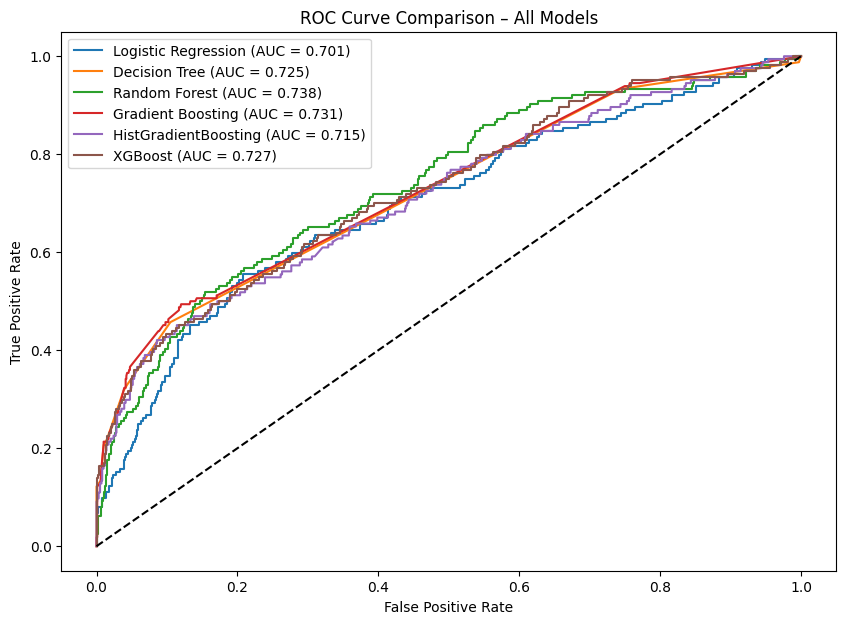

In [ ]:
plt.figure(figsize=(10,7))

for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['ROC_AUC']:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – All Models")
plt.legend()
plt.show()


---
### 9.3 RECALL VS ROC-AUC

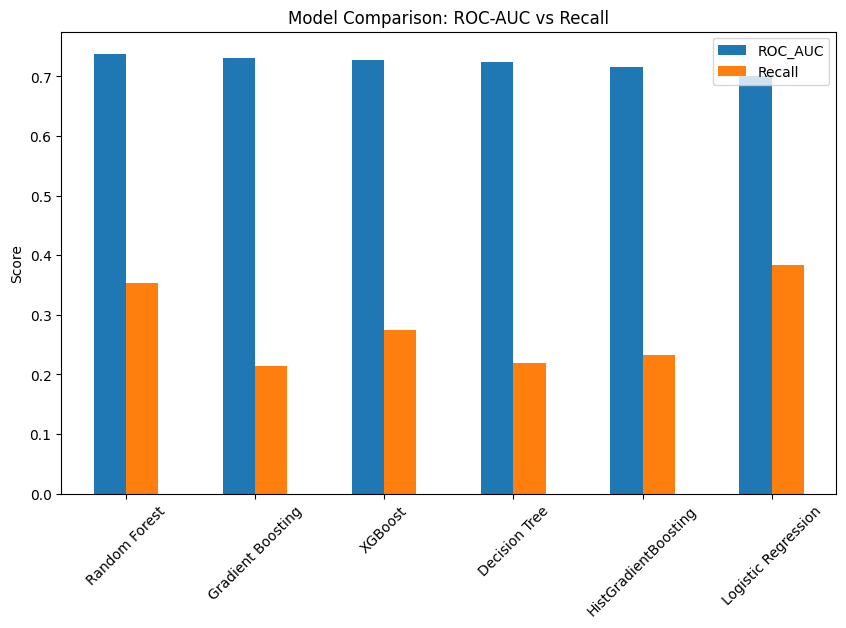

In [ ]:
results_df[['ROC_AUC', 'Recall']].plot(
    kind='bar',
    figsize=(10,6)
)
plt.title("Model Comparison: ROC-AUC vs Recall")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


---
### 10. BEST MODEL SELECTION & JUSTIFICATION

In [ ]:
best_model_name = results_df.index[0]
best_model_name

'Random Forest'

In [ ]:
joblib.dump(rf_model, "final_churn_model.pkl")

['final_churn_model.pkl']

---
### 10.1 Summary of Model Performance
The following models were evaluated using ROC-AUC, Recall, Precision, and F1-score, which are appropriate metrics for an imbalanced churn prediction problem:

| Model                | ROC-AUC   | Recall    | Precision | F1        |
| -------------------- | --------- | --------- | --------- | --------- |
| **Random Forest**    | **0.738** | 0.354     | 0.426     | **0.387** |
| Gradient Boosting    | 0.731     | 0.213     | 0.761     | 0.333     |
| XGBoost              | 0.727     | 0.274     | 0.634     | 0.383     |
| Decision Tree        | 0.725     | 0.220     | 0.706     | 0.335     |
| HistGradientBoosting | 0.715     | 0.232     | 0.576     | 0.330     |
| Logistic Regression  | 0.701     | **0.384** | 0.366     | 0.375     |


---
### 10.2 Interpretation of Evaluation Graphs

__1️. ROC Curve Comparison__

- Random Forest shows the highest ROC-AUC (0.738), indicating the best overall ability to distinguish between churned and non-churned customers.

- Gradient Boosting and XGBoost follow closely but do not surpass Random Forest.

- Logistic Regression performs worst in overall discrimination.

__2️. ROC-AUC vs Recall Bar Chart__

- Logistic Regression achieves the highest recall, but at the cost of:

  - Very low precision

  - Higher false positives

- Random Forest provides a balanced trade-off between recall and precision.

- Boosting models show strong precision but comparatively lower recall.

---
### 10.3 Business-Oriented Model Selection Logic
In a telecom churn scenario:

- Recall is important → missing a churner is costly

- But precision also matters → too many false churn alerts waste retention resources

- Therefore, the goal is balanced performance, not extreme recall or precision alone

---
### 10.4 FINAL MODEL SELECTED: Random Forest
__Why Random Forest was chosen:__

1. Highest ROC-AUC (0.738)

   - Best overall discriminatory power among all models

2. Balanced Recall and Precision

    - Captures a significant portion of churners

    - Avoids excessive false positives compared to Logistic Regression

3. Best F1-score (0.387)

    - Indicates the strongest balance between precision and recall

4. Model Stability & Interpretability

    - Less sensitive to noise than single trees

    - Feature importance can be easily explained to business teams

5. Operational Suitability

    - Robust for real-world deployment

    - Performs well without aggressive hyperparameter tuning

---
## 10.5 Why Other Models Were Not Selected

- Logistic Regression

  - High recall but poor precision

  - Leads to excessive false churn alerts

- XGBoost / Gradient Boosting

  - Strong precision but lower recall

  - Misses a higher number of churn customers

- Decision Tree

  - Simpler but less stable and lower overall performance

- HistGradientBoosting

  - Efficient but weaker performance compared to Random Forest

---
### 10.6 Final Statement
Multiple machine learning models were evaluated using ROC-AUC, Recall, Precision, and F1-score. Although Logistic Regression achieved higher recall, Random Forest demonstrated the best overall performance with the highest ROC-AUC and F1-score, offering a balanced trade-off between identifying churn customers and minimizing false positives. Hence, Random Forest was selected as the final model for churn risk prediction.

---
## 11. FEATURE IMPORTANCE

Feature importance analysis highlights the variables that most strongly influence customer churn predictions. The results indicate that customer service interactions, usage patterns, and billing-related variables play a significant role in determining churn behavior. Customers with a higher number of customer service calls tend to show a greater likelihood of churn, suggesting dissatisfaction with service quality or issue resolution.

Usage and charge-related features, such as call minutes and corresponding charges, also contribute notably to churn risk, indicating potential price sensitivity among heavy users. Additionally, service plan features, including international and voicemail plans, influence customer retention, reflecting differences in engagement and perceived value.

Overall, the feature importance results provide actionable insights that can help the business focus retention efforts on high-impact areas such as improving customer support, optimizing pricing strategies, and tailoring service plans for at-risk customers.


In [ ]:
# Get numeric feature names
num_features = numerical_cols

# Get categorical feature names from OneHotEncoder
cat_features = preprocessing_pipeline.named_transformers_['cat'] \
    .named_steps['onehot'] \
    .get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = list(num_features) + list(cat_features)

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
219,International Plan_ yes,0.064314
11074,CustServ Calls_4,0.053060
11075,CustServ Calls_5,0.033305
220,VMail Plan_ yes,0.031843
11071,CustServ Calls_1,0.013826
10895,International calls_2,0.011453
11076,CustServ Calls_6,0.009400
10759,International Mins_13.9,0.008791
11073,CustServ Calls_3,0.008692
9698,Night Calls_92,0.008335


In [ ]:
feature_importance_df['Feature'] = (
    feature_importance_df['Feature']
    .str.replace('_', ' ')
    .str.replace('cat ', '')
)


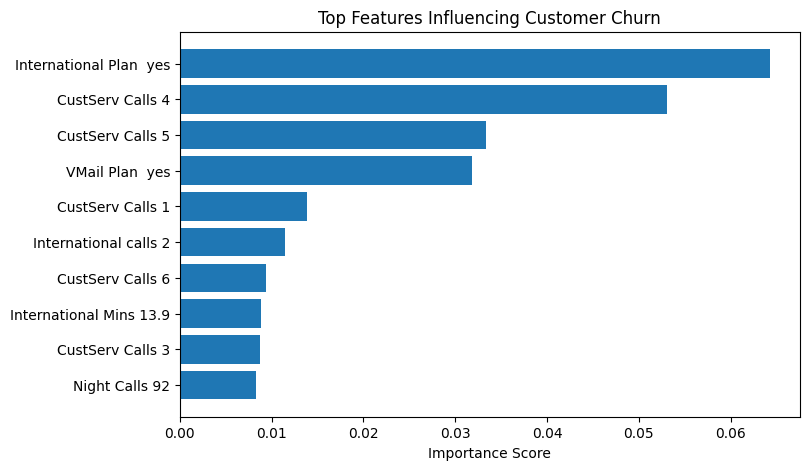

In [ ]:
top_n = 10
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df['Feature'][:top_n],
    feature_importance_df['Importance'][:top_n]
)
plt.gca().invert_yaxis()
plt.title("Top Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.show()


---
## 12. CHURN RISK SCORE GENERATION
Business requirement:

> Create churn risk scores for retention campaigns

In [ ]:
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype(str).str.strip()

X_processed = preprocessing_pipeline.transform(X)

df['Churn_Probability'] = rf_model.predict_proba(X_processed)[:, 1]

def churn_risk_band(prob):
    if prob >= 0.6:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df['Churn_Risk_Level'] = df['Churn_Probability'].apply(churn_risk_band)

df[['Churn_Probability', 'Churn_Risk_Level']].head()



,Churn_Probability,Churn_Risk_Level
0,0.436028,Medium Risk
1,0.486511,Medium Risk
2,0.471417,Medium Risk
3,0.466613,Medium Risk
4,0.476117,Medium Risk


---
### 12.1 Churn Risk Analysis (Interpretation)

- The displayed customers have churn probabilities in the range of ~0.43–0.49, which places them in the Medium Risk category.

- These customers are not certain churners, but they exhibit noticeable risk signals compared to low-risk users.

- Medium-risk customers typically represent the largest opportunity group for retention, as timely interventions can prevent escalation to high risk.

- Recommended actions for this segment include:

  - Personalized offers or plan optimization

  - Proactive communication (email/SMS/app notifications)

  - Monitoring service experience to avoid dissatisfaction triggers

---
### 12.2 Business Insight

> Instead of a binary churn decision, risk-based segmentation enables prioritized and cost-effective retention strategies, focusing effort where it can deliver the highest impact.

---
## 13. EXPORT FINAL OUTPUT FOR BUSINESS TEAM
Export Final Output for Business Team


In [ ]:
df.to_csv("Telecom_Churn_Predictions.csv", index=False)


---
## Conclusion

In this project, machine learning techniques were applied to address customer churn challenges faced by No-Churn Telecom. An end-to-end pipeline was developed, including data extraction, exploratory data analysis, preprocessing, model training, and evaluation.


Exploratory analysis revealed that factors such as customer service calls, usage patterns, and service plans significantly influence churn behavior. Multiple classification models were evaluated using ROC-AUC, Recall, Precision, and F1-score to handle the inherent class imbalance in churn data.


Among the evaluated models, Random Forest demonstrated the best overall performance, achieving the highest ROC-AUC and F1-score while maintaining a balanced trade-off between identifying churn customers and minimizing false positives. Instead of relying on a fixed binary prediction, churn probabilities were converted into risk categories (Low, Medium, High) to enable actionable and cost-effective retention strategies.


This risk-based approach allows the business to prioritize customer retention efforts, optimize marketing campaigns, and proactively engage customers before churn occurs. The final solution is robust, interpretable, and suitable for real-world deployment.